### *АВТ-910_ЛР-2_Безденежных_Васильев*

## Цель работы 

Знакомство и освоение работы с дополнительными методами машинного обучения для решения задачи регрессии библиотеки sklearn.

## Ход работы
Ознакомиться с методическими материалами и примерами выполнения команд.
Последовательно выполнить следующие шаги применительно к выборке данных, согласно варианту задания:

1. Загрузка данных
  1. Выполнить загрузку файла с подготовленным набором данных (отчищенный от пропусков и выбросов для целевой и независимых переменных) в таблицу _df_

  2. Объявить список независимых и целевой переменных
  
  3. Оставить в таблице данных _df_ столбцы, относящиеся только к списку независимых и целевой переменных

2. Выполнить процедуры стандартизации данных и сохранить в отдельную таблицу _df_scaled_
  
  1. Получите величину среднего значения и среднеквадратического отклонения для целевой переменной

  2. Для целевой переменной построить гистограммы распределения стандартизированых и  исходных значений 
  

3. Сформировать обучающую и проверочную части:

  1. На основе НЕ стандартизированной выборке _x__train_ , _x__test_ , _y__train_ , _y__test_
  2.  На основе стандартизированной выборке _xStd__train_ , _xStd__test_ , _yStd__train_ , _yStd__test_

4. Построить две модели методом SGDRegressor: на стандартизированных и НЕ стандартизированных данных 
  1. Получить метрики RMSE, R2
  2. Построить диаграмму рассеяния вычисленных значений Y_pred от проверочных значений Y_test
  3. Построить гистограмму остатков (разностей между Y_pred и Y_test)
  4. Сравнить полученные результаты
  
  
5. Используя модель SGDRegressor и прием кросс-валидации получить на проверочной части НЕ стандартизированных и стандартизированных данных оценки точности: R2(коэфф. детерминации) и RMSE (среднеквадратичное отклонение).

6. Провести сравнение точности полученных моделей в зависимости от типа модели и типа данных



## Содержание отчета
<font color='red'>Название отчета должно быть в формате:
<br>АВТ-9xx_ЛР-xx_Фамилия1_Фамилия2
</font>


1. Список выбранных  целевой переменной 'y' и независимых признаков 'x1, x2, x3, ...', 

2. Описание процесса загрузки и стандартизации с выводом значений таблиц


3. Гистограммы распределения исходных и стандартизированных значений для  целевой переменной 'y' и независимых признаков



4. Результаты построения и сравнения моделей SGDRegressor
  1. Значения точности R2 и RMSE
  2. Диаграмма рассеяния вычисленных значений Y_pred от проверочных значений Y_test
  3. Гистограмму остатков (разностей между Y_pred и Y_test)
  
5. Оценки точности полученные приемом кросс-валидации на проверочных частях выборки.

6. Выводы по результатам сравнительного анализа полученных регрессионных моделей


## Список литературы и доп. материалы:


Список материалов:

1. [Рус] Дьяконов А. Ансамбли в машинном обучении. URL:
https://dyakonov.org/2019/04/19/%D0%B0%D0%BD%D1%81%D0%B0%D0%BC%D0%B1%D0%BB%D0%B8-%D0%B2-%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%BC-%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B8/

2. Scikit-learn. стохастический градиентный спуск

  2.1 [Eng] Scikit-learn. Класс стохастического градиентного спуска. URL: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

  2.2 [Eng] Scikit-learn. Класс стохастического градиентного спуска. URL: https://scikit-learn.org/stable/modules/sgd.html#regression

3. Стандартизация

  3.1. [Eng] Scikit-learn. Стандартизация. URL: https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling

  3.2. [Eng] Scikit-learn. Сравнение влияния различных шкал на данные в выбросами. URL: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html


4. [Рус] Мюллер А., Гвидо С. Введение в машинное обучение с помощью Python //Руководство для специалистов по работе с данными. СПб.: ООО «Альфа-книга. – 2017. –  с. 269 (Перекрестная проверка)

- - - 

# Подключение библиотек

In [1]:
# Python 3.8
import pandas as pd
import numpy  as np

from sklearn import linear_model
from sklearn import ensemble
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns

In [2]:
import  sklearn
print("версия scikit-learn: {}".format(sklearn.__version__))
print("версия pandas: {}".format(pd.__version__))
print("версия numpy: {}".format(np.__version__))

версия scikit-learn: 1.1.2
версия pandas: 1.5.0
версия numpy: 1.23.3


# Объявление функций

Для повышения повторяемости кода и повышения уровня читаемости объявим несколько функций с уже знакомыми операциями

In [3]:
def PLOT34(y_test, y_pred):
    '''
    Функция построения графиков
    :param y_test: - проверочные значения целевой переменный
    :param y_pred: - вычисленные значения целевой переменный
    '''
    plt.figure(figsize=(12,6))
    
    # == Диаграмма рассеяния вычисленных значений ==
    # создать первое полотно 121: 1-строк, 2-столбцов, 1-индекс текущего полотна в сетке
    plt.subplot(121)
    plt.scatter(y_test, y_pred,  alpha=0.1)
    plt.scatter(y_test, y_test,  alpha=0.1)
    plt.title('Диаграмма рассеяния вычисленных значений');
    plt.xlabel('Проверочное Y')
    plt.ylabel('Вычисленное Y')

    
    # == Диаграмма рассеяния ошибок ==
    # создать первое полотно 121: 1-строк, 2-столбцов, 2-индекс текущего полотна в сетке
    plt.subplot(122)
    plt.scatter(y_test, (y_test - y_pred)**2,  alpha=0.1)
    plt.title('Диаграмма рассеяния ошибок')
    plt.xlabel('Проверочное Y')
    plt.ylabel('Абсолютная ошибка')

In [4]:
def GET_METRICS_SINGLE(y_test, y_pred):
    '''
    Вычисление и вывод метрик: MAE, RMSE, R2.
    На основе сравнения проверочных и вычисленных.
    :param y_test: - проверочные значения целевой переменный
    :param y_pred: - вычисленные значения целевой переменный
    '''
    mae  = metrics.mean_absolute_error        (y_test, y_pred)
    rmse = np.sqrt( metrics.mean_squared_error(y_test, y_pred))
    r2   = metrics.r2_score                   (y_test, y_pred)

    print ("MAE - средняя абсолютная ошибка: {:>7,.0f}".format               ( mae ))
    print ("RMSE - кв. корень из среднеквадратичной ошибки: {:>7,.0f}".format( rmse ))
    print ("R2 - коэфф. детерминации:        {:>7,.3f}".format               ( r2 ))

# Загрузка подготовленных данных


Для сохранения данных в ЛР-1,2 используйте команду
```
   data.to_csv('./путь/имя_файла.csv', index=False), где:
     './путь/имя_файла.csv' - абсолютный или относительный путь к новому файлу;
     index=False - значение параметра для исключения столбца с идентификаторами.
```

In [5]:
df = pd.read_csv('./assets/datasets/var20/bike-sharing-dataset_nan_PREPARED.csv', # путь к файлу, (используй автодотолнение)
                   sep=',', # разделитель данных в файле
                   header=0, # номер строки с заголовками, нумерация с нуля
                   # header='None', # если заголовки отсутствуют
                  )
print("Размер таблицы", df.shape)
df[:2]

Размер таблицы (16470, 16)


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,8.0,32.0,40.0


Для начала определим точный список признаков с целевой и независимыми признаками, а после оставим в таблице только перечисленные столбцы.

In [6]:
features = ['temp', 'hr', 'weekday',  'mnth', 'season', 'hum', 'weathersit']
target = ['cnt']

In [7]:
df = df[features + target]
df[:2]

,temp,hr,weekday,mnth,season,hum,weathersit,cnt
0,0.24,0.0,6.0,1.0,1.0,0.81,1.0,16.0
1,0.22,1.0,6.0,1.0,1.0,0.80,1.0,40.0


In [8]:

df['temp'] *= 1000000
df['hr'] *= 100
df['weekday'] *= 100
df['mnth'] /= 1000000
df['season'] /= 10
df['hum'] /= 100
df['weathersit'] *= 1
df['cnt']*= 1000000

df 

,temp,hr,weekday,mnth,season,hum,weathersit,cnt
0,240000.0,0.0,600.0,0.000001,0.1,0.0081,1.0,16000000.0
1,220000.0,100.0,600.0,0.000001,0.1,0.0080,1.0,40000000.0
2,220000.0,200.0,600.0,0.000001,0.1,0.0080,1.0,32000000.0
3,240000.0,300.0,600.0,0.000001,0.1,0.0075,1.0,13000000.0
4,240000.0,400.0,600.0,0.000001,0.1,0.0075,1.0,1000000.0
...,...,...,...,...,...,...,...,...
16465,260000.0,1900.0,100.0,0.000012,0.1,0.0060,2.0,119000000.0
16466,260000.0,2000.0,100.0,0.000012,0.1,0.0060,2.0,89000000.0
16467,260000.0,2100.0,100.0,0.000012,0.1,0.0060,1.0,90000000.0
16468,260000.0,2200.0,100.0,0.000012,0.1,0.0056,1.0,61000000.0


# Приведение к новой шкале значений

Важнейшими числовыми характеристиками случайной величины являются:

- Математическое ожидание, имеющее смысл среднего значения  (mean)  $ {\\mu} $ (мю) - центр распределения случайной величины
      .mean()
      
- Среднеквадратическое отклонение (Standard_deviation) $ {\\sigma} $ (сигма) - показатель рассеивания относительно её мат. ожидания.
      .std()
      
- Дисперсия (Variance) $ {\\var = sigma^2} $ (сигма в квадрате) - мера разброса относительно её мат. ожидания.
      .var  =  .std()**2


Некоторые методы машинного обучения 
сильно чувствительны к шкалированию данных. 

При подготовки данных чаще всего выполняются процедуры: 

- либо __нормализации__  -  приведения значений к диапазону от 0.0 до 1.0 Пример:
      
      |--------------|+++++++++|----|
      |--------------|++++++++++++++|
      0             1900     1970  2000
      
      Обрабатываемое: 1970
      Макс. значение: 1900
      Мин. значение:  2000
      
      Процедура нормализации:
      x_norm = ( x - X.min() ) / ( X.max() -  X.min() )
      x_norm = ( 1970 - 1900 ) / (2000 - 1900)
      x_norm = 70 / 100
      x_norm = 0.70
      
      Восстановление:
      x = ( x_norm * ( X.max() -  X.min() ) +  X.min()
      x = ( 0.70 * (2000 - 1900) + 1900
      x = ( 0.70 * 100) + 1900
      x = 70 + 1900
      x = 1970



- либо __стандартизации__ - предобработки данных, после которой каждый признак имеет среднее (mean) = 0 и дисперсию (variance) = 1. Стандартизовать - вычесть среднее и поделить на стандартное отклонение. Критично для линейных моделей.
      X_stantartised = (X - X.mean()) / X.std()

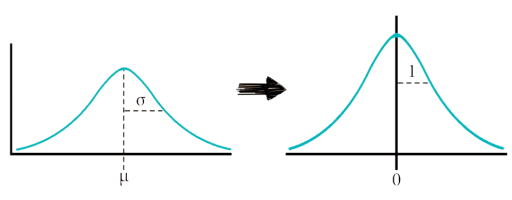
<p style="text-align: right;"> Рис. 1. Вид гистограмм до и после стандартизации </p>

"Одно из наиболее важных допущений при работе с линейными моделями, параметры которых оцениваются методом наименьших квадратов, состоит в том, что остатки модели независимы (т.е. не коррелируют) и имеют нормальное распределение со средним значением 0 и некоторым фиксированным стандартным отклонением"

Среднекв. откл. (Stand._dev.) 24.166091947189145
Дисперсия (Variance)  584.0
Среднее (Mean) 1956.0


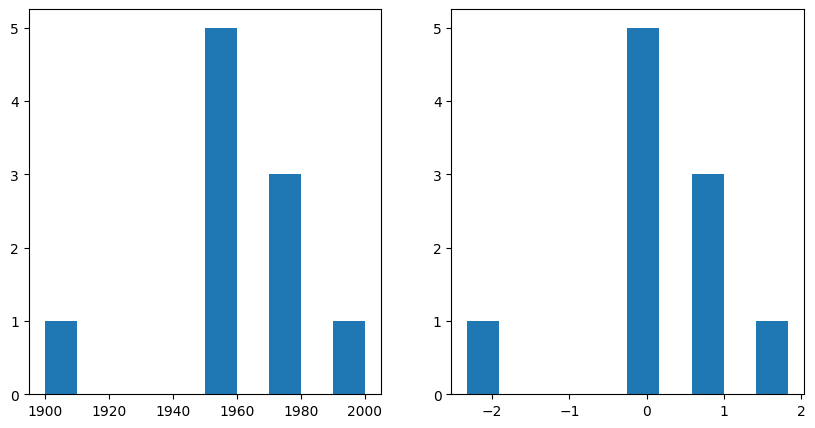

In [9]:
# Пример операции стандартизации
df_ex1 = pd.DataFrame(np.array([
    1900, 1950,1950,1950,1950,1950,1970,1970,1970, 2000 # последовательность
]))
print ("Среднекв. откл. (Stand._dev.)", df_ex1.std(ddof=0)[0])
print ("Дисперсия (Variance) ", df_ex1.var(ddof=0)[0])
print ("Среднее (Mean)", df_ex1.mean()[0])

# X_stantartised = (X - X.mean()) / X.std()
df_Std = (df_ex1 - df_ex1.mean())/df_ex1.std(ddof=0)

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.hist(df_ex1)  # в google colab следует использовать df_ex1.values
plt.subplot(122)
plt.hist(df_Std); # в google colab следует использовать df_Std.values

- - -

Для дальнейшей работы рассмотрим способы выполнения операции стандартизации

## Стандартизация. Способ #1

Благодаря наличию функций вычисления статистических характеристик в библиотеке pandas, стандартизацию можно выполнить прямом вычислением.

In [10]:
df_scaled = (df - df.mean()) / df.std(ddof=0) # обязательный параметр ddof=0
df_scaled[:2]

,temp,hr,weekday,mnth,season,hum,weathersit,cnt
0,-1.308713,-1.644338,1.495294,-1.589926,-1.338695,0.930684,-0.671309,-1.016417
1,-1.412530,-1.500854,1.495294,-1.589926,-1.338695,0.878422,-0.671309,-0.859222


## Стандартизация. Способ #2.

В библиотеке sklearn, для выполнения процедуры стандартизации, присутствует более удобный класс __sklearn.preprocessing.StandardScaler__, который содержит методы:

- __StandardScaler.fit(  X  )__ - вычисление значений __среднего__ и __дисперсии__

- __StandardScaler.transform( X )__ - прямого преобразования из истинного значения к приведенному

- __StandardScaler.inverse_transform( X )__ - обратного преобразования из приведенного значения в истинное

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
#  вычисление значений среднего и дисперсии отдельно для каждого признака
scaler.fit(df)

StandardScaler()

In [13]:
print (" {:>3} {:<25} {:>16} {:>16}".format(
 "№", "Признак", "Средрее", "Ср.кв.откл."
))
for icol in range (0, len(df.columns)):
    print (" {:>3} {:<25} {:>16.3f} {:>16.3f}".format(
                   icol, 
                   df.columns[icol],
                   scaler.mean_[icol],
                   np.sqrt ( scaler.var_[icol]), # кв. корень (из дисперсии)
                  )
          )

   № Признак                            Средрее      Ср.кв.откл.
   0 temp                            492119.004       192646.517
   1 hr                                1146.005          696.940
   2 weekday                            299.217          201.153
   3 mnth                                 0.000            0.000
   4 season                               0.249            0.111
   5 hum                                  0.006            0.002
   6 weathersit                           1.431            0.642
   7 cnt                          171182756.527    152676251.062


При прямом преобразовании значений (функция transform()) данные возвращаются без информации о принадлежности к строкам и столбцам.

In [14]:
scaler.transform(df)

array([[-1.30871302, -1.64433838,  1.49529355, ...,  0.93068362,
        -0.67130868, -1.01641713],
       [-1.4125301 , -1.50085396,  1.49529355, ...,  0.87842209,
        -0.67130868, -0.85922176],
       [-1.4125301 , -1.35736954,  1.49529355, ...,  0.87842209,
        -0.67130868, -0.91162021],
       ...,
       [-1.20489593,  1.36883436, -0.99037277, ..., -0.16680853,
        -0.67130868, -0.5317314 ],
       [-1.20489593,  1.51231877, -0.99037277, ..., -0.37585465,
        -0.67130868, -0.72167581],
       [-1.20489593,  1.65580319, -0.99037277, ...,  0.09449913,
        -0.67130868, -0.80027349]])

Для удобства восприятия сформируем новую таблицу (DataFrame) с указанием названий признаков и идентификаторов строк, соответствующих таблице-оригиналу. Сравните значения с таблице в п. 5.1.

In [15]:
# создать новую таблицу (DataFrame) 
# со стандартизированными значениями

df_scaled = pd.DataFrame (
  data    = scaler.transform(df), # значения ячеек    <<--
  columns = df.columns,           # названия столбцов
  index   = df.index              # идентификаторы строк
)
df_scaled[:2]

,temp,hr,weekday,mnth,season,hum,weathersit,cnt
0,-1.308713,-1.644338,1.495294,-1.589926,-1.338695,0.930684,-0.671309,-1.016417
1,-1.412530,-1.500854,1.495294,-1.589926,-1.338695,0.878422,-0.671309,-0.859222


Используя класс  __sklearn.preprocessing.StandardScaler__ становится доступна операция обратного предобразования к исходным НЕ стандартизированным значениям. Этот прием пригодится позже при работе с обученной моделью.

In [16]:
# строка в стандартизированном виде
df_scaled[0:1]

,temp,hr,weekday,mnth,season,hum,weathersit,cnt
0,-1.308713,-1.644338,1.495294,-1.589926,-1.338695,0.930684,-0.671309,-1.016417


In [17]:
# Результат обратного преобразования обернутые в таблицу (DataFrame) 
pd.DataFrame (  
    scaler.inverse_transform(  
        df_scaled[0:1]  )
)

,0,1,2,3,4,5,6,7
0,240000.0,0.0,600.0,1.000000e-06,0.1,0.0081,1.0,16000000.0


Посмотрим исходные значения и сравним с восстановлеными 

In [18]:
df[0:1]

,temp,hr,weekday,mnth,season,hum,weathersit,cnt
0,240000.0,0.0,600.0,0.000001,0.1,0.0081,1.0,16000000.0


Значения полностью совпадают, что говорит о том, что преобразования выполнены верно

## Информация по целевой переменной
Получите величину среднего значения и дисперсии для целевой переменной

In [19]:
print(f'Математическое ожидение (среднее значение) — {df.mean()[0] :.3f}')
print(f'Дисперсия — {df.var(ddof=0)[0] :.3f}')

Математическое ожидение (среднее значение) — 492119.004
Дисперсия — 37112680434.224


Построить гистограммы распределения исходных и стандартизированных значений для целевого признака

In [20]:
df

,temp,hr,weekday,mnth,season,hum,weathersit,cnt
0,240000.0,0.0,600.0,0.000001,0.1,0.0081,1.0,16000000.0
1,220000.0,100.0,600.0,0.000001,0.1,0.0080,1.0,40000000.0
2,220000.0,200.0,600.0,0.000001,0.1,0.0080,1.0,32000000.0
3,240000.0,300.0,600.0,0.000001,0.1,0.0075,1.0,13000000.0
4,240000.0,400.0,600.0,0.000001,0.1,0.0075,1.0,1000000.0
...,...,...,...,...,...,...,...,...
16465,260000.0,1900.0,100.0,0.000012,0.1,0.0060,2.0,119000000.0
16466,260000.0,2000.0,100.0,0.000012,0.1,0.0060,2.0,89000000.0
16467,260000.0,2100.0,100.0,0.000012,0.1,0.0060,1.0,90000000.0
16468,260000.0,2200.0,100.0,0.000012,0.1,0.0056,1.0,61000000.0


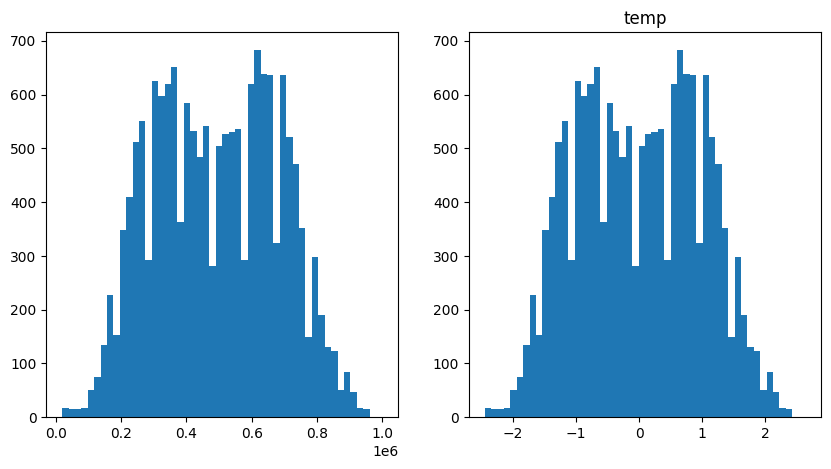

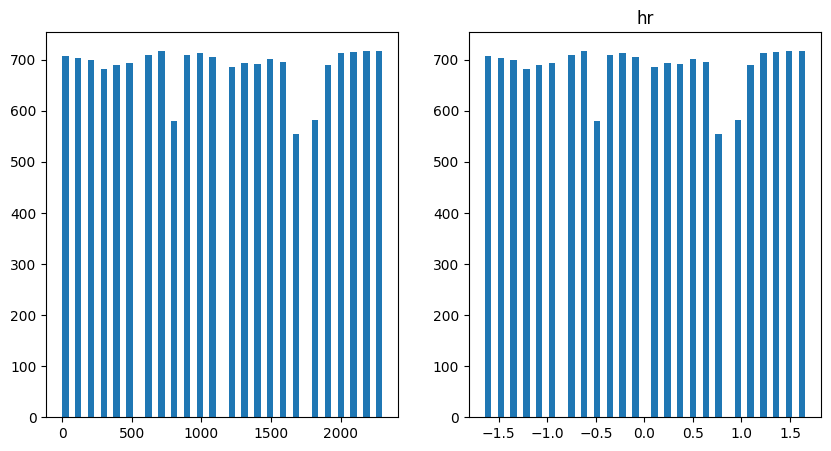

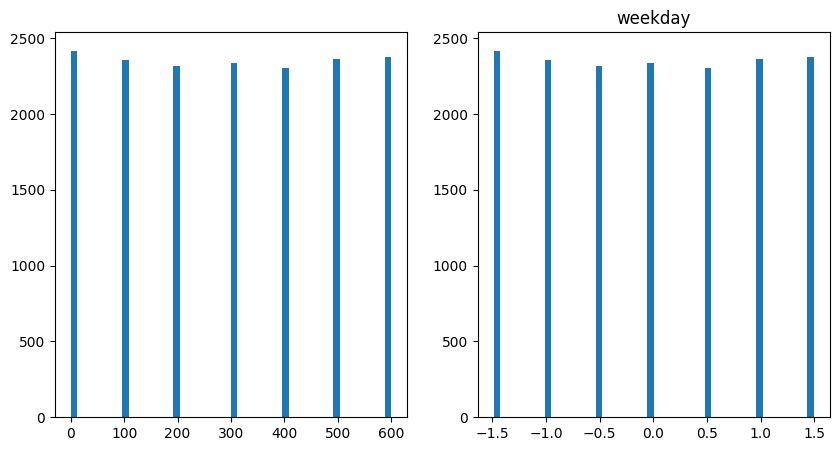

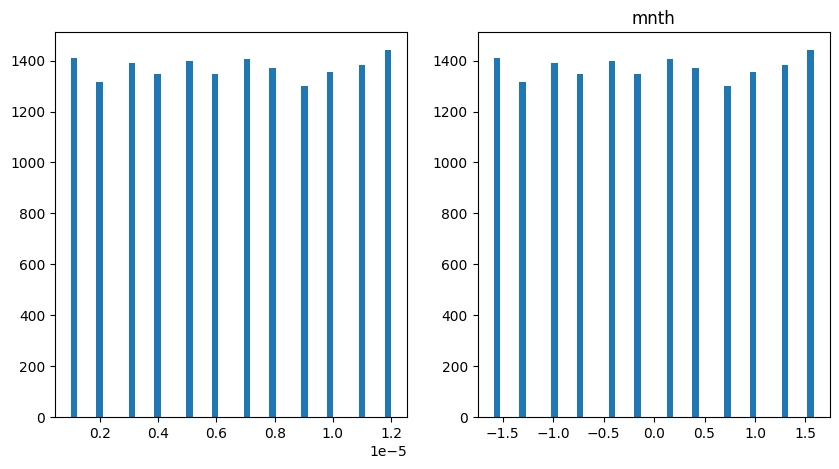

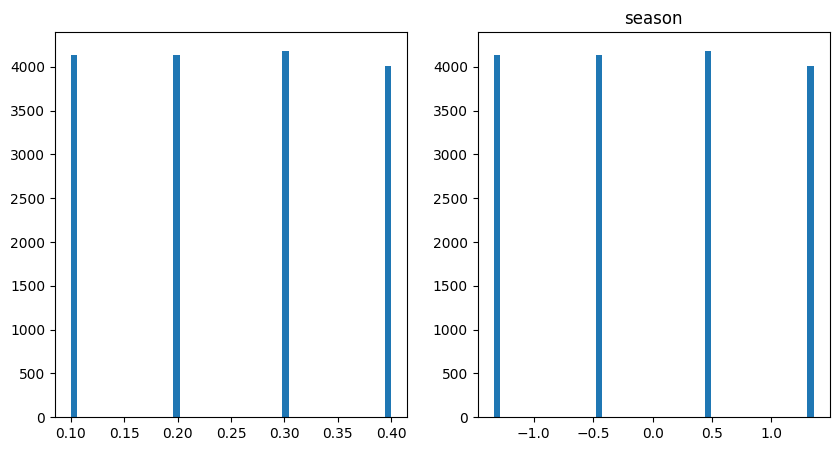

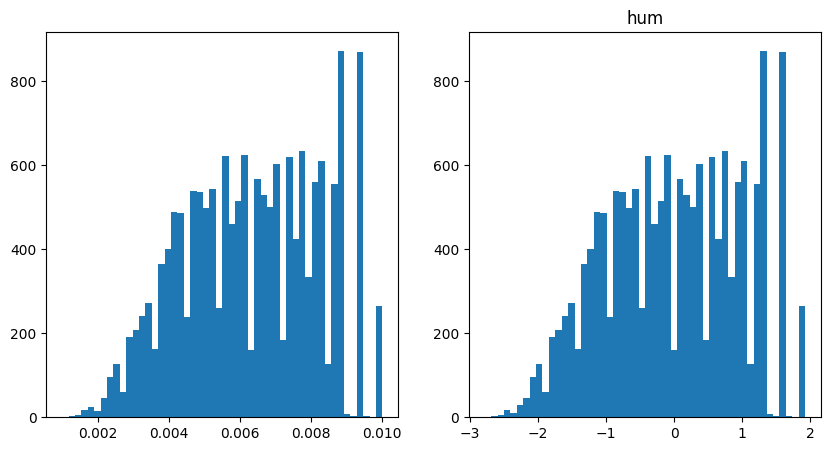

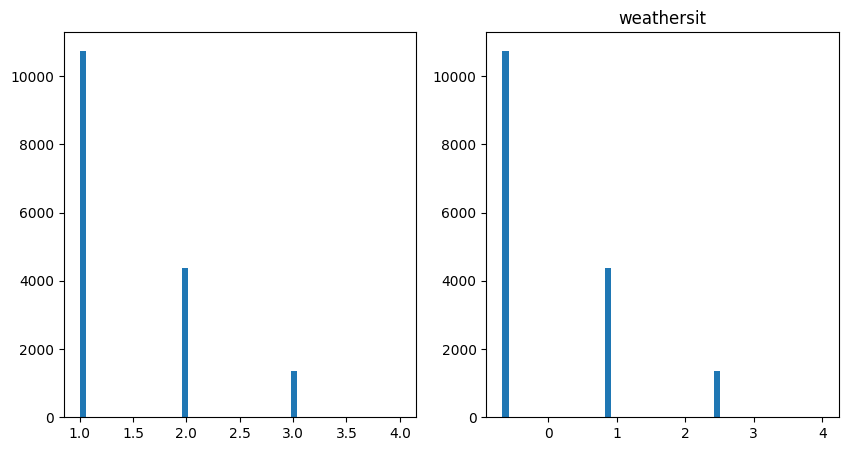

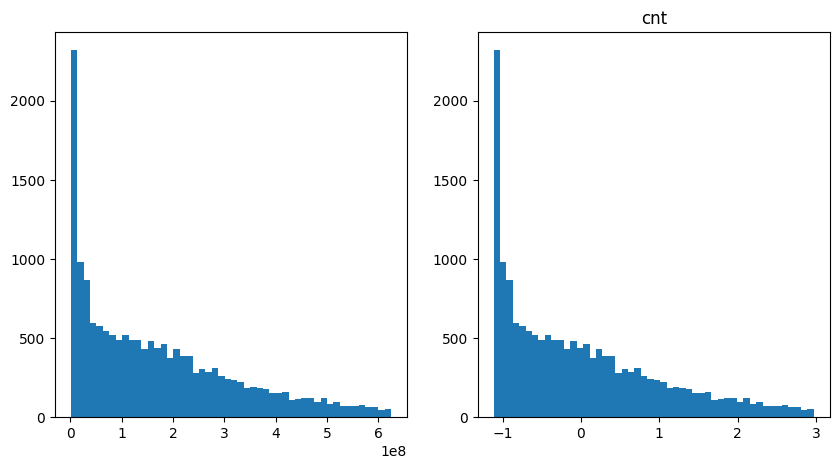

In [21]:
for i in df.columns:
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.hist(df[i], bins=50)
    plt.subplot(122)
    plt.hist(df_scaled [i] , bins=50)
    plt.title(i)

In [22]:
# X_standardised = (X - X.mean()) / X.std()


# Формирование тренировочной и проверочной выборок

In [23]:
valid_size = 0.3 # доля тестовой части в выборке
rand_seed = 8 # начальное состояние генератора случ. чисел

##  НЕ Стандартизованные

In [24]:
x_train, x_test, y_train, y_test =  train_test_split(
    df[features],    # исходные данные X
    df[target],      # исходные данные y
    
    test_size = valid_size, # доля тестовой части в выборке
    random_state=rand_seed, # начальное состояние генератора случ. чисел
    shuffle=True            # перемешивание
) 
y_train = y_train['cnt']
y_test = y_test['cnt']

x_train[:2]

,temp,hr,weekday,mnth,season,hum,weathersit
6883,440000.0,100.0,300.0,0.000010,0.4,0.0067,1.0
13356,760000.0,900.0,300.0,0.000008,0.3,0.0066,2.0


In [25]:
y_train.loc[:2]

6883      12000000.0
13356    341000000.0
15474    276000000.0
2543     135000000.0
16406     44000000.0
            ...     
3425     162000000.0
4073      30000000.0
10370    116000000.0
5684      54000000.0
2         32000000.0
Name: cnt, Length: 2360, dtype: float64

In [26]:
print ("Кол-во элементов: \n  x_train: {}, y_train {} \n  x_test:  {}, y_test  {} \n  total x: {}, total y {} ".format  (
    len(x_train), len(y_train),
    len(x_test),  len(x_test), 
    len(x_train)+len(x_test), len(y_train)+len(x_test),
))

Кол-во элементов: 
  x_train: 11529, y_train 11529 
  x_test:  4941, y_test  4941 
  total x: 16470, total y 16470 


## Стандартизованные

In [27]:
xStd_train, xStd_test, yStd_train, yStd_test =  train_test_split(
    df_scaled[features],    # исходные данные X
    df_scaled[target],      # исходные данные y
    
    test_size=valid_size, # доля тестовой части в выборке
    random_state=rand_seed, # начальное состояние генератора случ. чисел
    shuffle=True            # перемешивание
) 

yStd_train = yStd_train['cnt']
yStd_test = yStd_test['cnt']


xStd_train[:]

,temp,hr,weekday,mnth,season,hum,weathersit
6883,-0.270542,-1.500854,0.003894,1.006068,1.356367,0.199022,-0.671309
13356,1.390531,-0.352979,0.003894,0.429181,0.458013,0.146761,0.887475
15474,-0.685811,0.938381,-1.487506,1.294512,1.356367,0.146761,-0.671309
2543,0.352360,1.368834,1.495294,-0.724595,-0.440341,1.035207,0.887475
16406,-1.204896,-0.496463,1.495294,1.582956,-1.338695,0.930684,0.887475
...,...,...,...,...,...,...,...
5480,1.390531,0.077475,0.998160,0.429181,0.458013,0.146761,0.887475
6995,-0.478176,0.794897,-1.487506,1.006068,1.356367,-1.473347,-0.671309
10376,1.079080,0.220959,0.998160,-1.013039,-0.440341,-0.793947,0.887475
2181,-0.893445,-0.926916,0.998160,-0.724595,-0.440341,1.244253,0.887475


In [28]:
yStd_train.loc[:2]

6883    -1.042616
13356    1.112270
15474    0.686533
2543    -0.236990
16406   -0.833023
           ...   
3425    -0.060145
4073    -0.924720
10370   -0.361436
5684    -0.767524
2       -0.911620
Name: cnt, Length: 2360, dtype: float64

# Проверка влияния стандартизации

Для исследования влияния процесса стандартизации используем новый тип модели - __linear_model.SGDRegressor__. Особенности внутреннего устройства рассматривать пока не будем.

В библиотеке sklearn большинство методов обладают единым интерфейсом взаимодействия и содержат методы
```
- model.fit(x_train, y_train) - обучение модели, вычисление коэфф. для входных признаков

- y_pred = model.predict(x_test) - прогноз модели, вычисление откликов
```

## Модель SGDRegressor. НЕ стандартизованные

In [29]:
# 1. Создать объект класса с моделью стохастического градиентного спуска
sgd_reg_nonStd = linear_model.SGDRegressor(
    max_iter=10000,
    tol=1e-3,
    random_state=8,

)

# 2. Обучим модель (подберем/подогоним параметры модели)  на НЕ СТАНДАРТИЗИРОВАНОМ проверочном наборе
sgd_reg_nonStd.fit(  x_train,  y_train)

# 3. Получить вычисленные(predicted) зн. на СТАНДАРТИЗИРОВАНОМ проверочном наборе
y_pred = sgd_reg_nonStd.predict ( x_test)
y_pred

array([2.15832459e+19, 8.53711022e+18, 1.75535836e+19, ...,
       1.19435330e+19, 1.70267673e+19, 1.86744766e+19])

In [30]:
len(y_pred)

4941

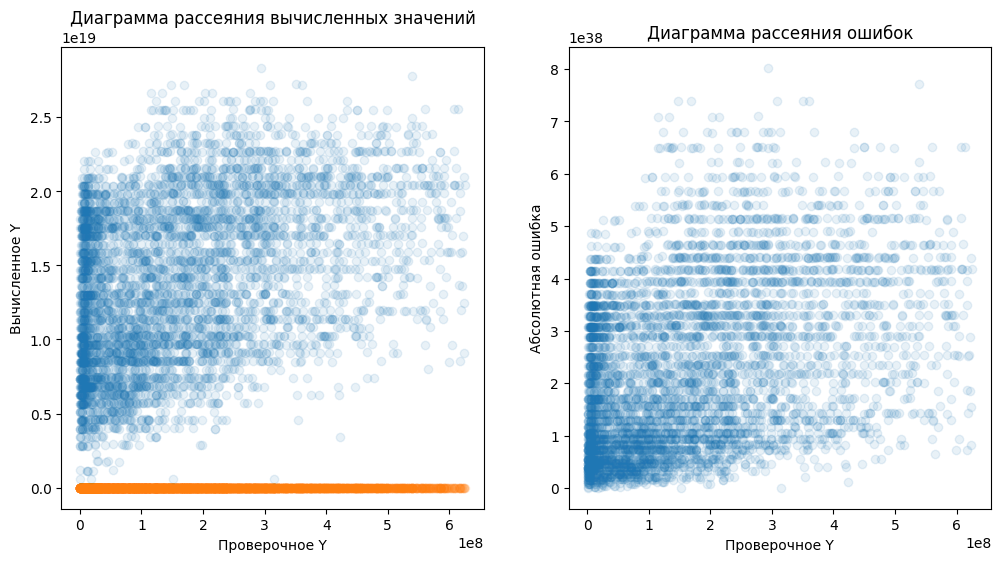

In [31]:
# 4. Построить графики для оценки ошибки
PLOT34(y_test, y_pred)

In [32]:
# 5. Получить численные оценки ошибки
GET_METRICS_SINGLE(y_test, y_pred)

MAE - средняя абсолютная ошибка: 13,997,345,247,143,196,672
RMSE - кв. корень из среднеквадратичной ошибки: 15,028,396,175,494,846,464
R2 - коэфф. детерминации:        -9,941,460,760,424,225,964,032.000


## Модель SGDRegressor. Cтандартизованные

In [33]:
# 1. Создать объект класса с моделью стохастического градиентного спуска
sgd_reg_std =   linear_model.SGDRegressor(
    max_iter=10000,
    tol=1e-3,
    random_state=8,

)

# 2. Обучим модель (подберем/подогоним параметры модели)  на НЕ СТАНДАРТИЗИРОВАНОМ проверочном наборе
sgd_reg_std.fit(  xStd_train,  yStd_train)

# 3. Получить вычисленные(predicted) зн. на СТАНДАРТИЗИРОВАНОМ проверочном наборе
yStd_pred = sgd_reg_std.predict ( xStd_test)
yStd_pred

array([ 0.77552528, -0.05952909, -0.25633252, ..., -0.00718656,
        0.32955009, -0.16733782])

In [34]:
len(yStd_pred)

4941

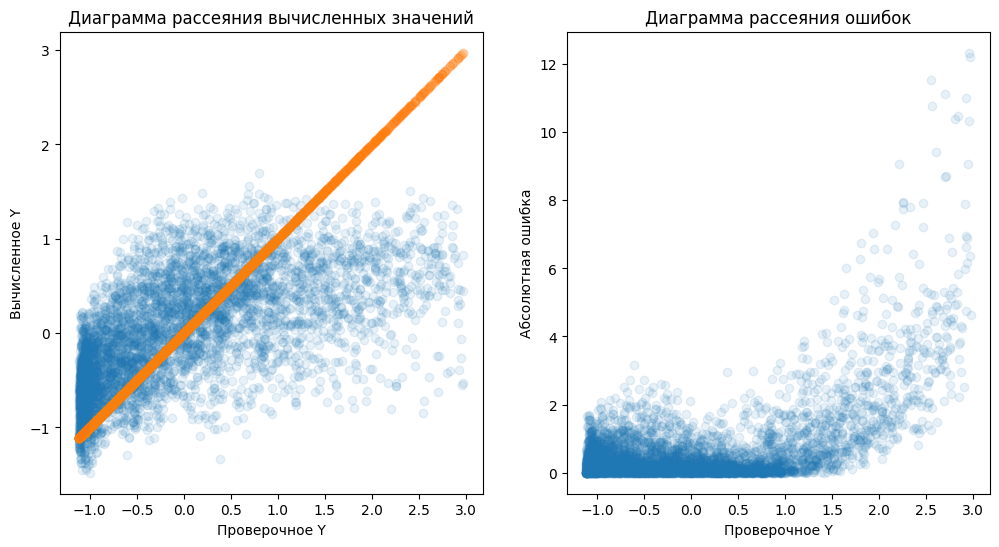

In [35]:
PLOT34(yStd_test, yStd_pred)

In [36]:
# 5. Получить численные оценки ошибки
GET_METRICS_SINGLE(yStd_test, yStd_pred)

MAE - средняя абсолютная ошибка:       1
RMSE - кв. корень из среднеквадратичной ошибки:       1
R2 - коэфф. детерминации:          0.365


## Заключение по полученым результатам
Сравните точности полученых моделей и сделайте вывод о том, как влияет процедура предварительной стандартизации на точность.

Точность стандартизированной модели близка к нестандартизированной (Разница между коэфф. детерминации всего 0.005)

rand_seed = 8, R2 = 0.360, R2_std = 0.365

---
rand_seed = 9, R2 = 0.358, R2_std = 0.359

rand_seed = 10, R2 = 0.348, R2_std = 0.371

---

Разница в точности моделей зависит от сида, но не более чем на 0.02

# Кросс-валидация

В виду того, что при разделении на обучающую и проверочные части используется случайный выбор, оценки точности обученой модели будут напрямую зависеть каждого нового случайного распределения образцов. При этом от случая к случаю оценки точности будут изменятся. 

Для полученя более объективной оценки применятеся прием Кросс-валидации (cross-validation) или скользящего контроля — процедура эмпирического оценивания обобщающей способности алгоритмов. 

Обобщающая способность — это способность модели выдавать правильные результаты не только для примеров, участвовавших в процессе обучения, но и для любых новых, проверочных.

Обучающая (Train) часть выборки разделяется на K-частей, для каждой из которых:
 - происходит создание и обучение модели на данных не принадлежащих текущей K-части
 - полученая промежуточная модель получает оценку точности по образцам K-части

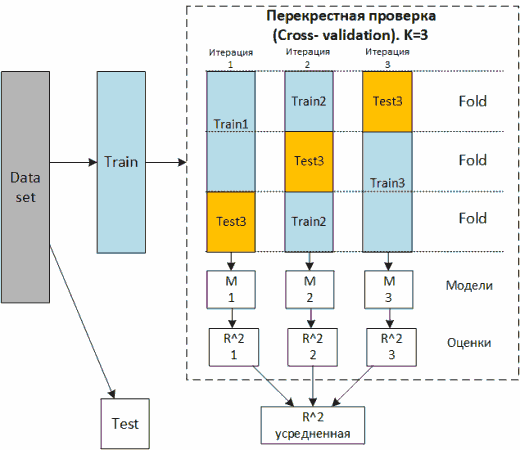



В библиотеке sklearn в пакете sklearn.model_selection присоветуют слудующие функции

- cross_val_score (estimator, X, y, cv, scoring) - получение единственной метрики
- cross_validate  (estimator, X, y, cv, scoring) - получение нескольких метрик
- cross_val_predict(estimator, X, y, cv=3) - получить отклики, вычисленные моделью над набором входных значений

где, scoring - Метрики регрессии имеет режимы:
  - r2 - коэфф. детерминации (R2)
  - neg_mean_squared_error - ср. кв. ошибка (MSE)
  - neg_root_mean_squared_error - кв. корень из ср. кв. ошибки (RMSE)

In [37]:
modelForCV =  linear_model.SGDRegressor(
    max_iter=10000,
    tol=1e-3,
    random_state=8,
)

In [38]:
print("R2. НЕ Стандартизированные  проверочные данные")
scores_cross = cross_val_score(
                                    estimator = modelForCV, # Модель для обучения (вызова метода .fit())
                                    X=x_test,   # Независимые переменные
                                    y=y_test,   # Целевая переменная
                                    cv=3,       # Кол-во K-частей (Fold)
                                    scoring='neg_root_mean_squared_error'# Режим расчитываемой метрики
                                )

print("Значения метрики по каждому блоку cv:", scores_cross)
print("Усредненное значение метрики:", scores_cross.mean())
print('Дисперсия (RMSE): ', scores_cross.var())

R2. НЕ Стандартизированные  проверочные данные
Значения метрики по каждому блоку cv: [-3.42498172e+19 -1.73086047e+19 -1.24472765e+19]
Усредненное значение метрики: -2.133523279521803e+19
Дисперсия (RMSE):  8.73319973020224e+37


In [39]:
print("R2. Стандартизированные проверочные данные")
scores_cross = cross_val_score(
                                    estimator = modelForCV, # Модель для обучения (вызова метода .fit())
                                    X=xStd_test,   # Независимые переменные
                                    y=yStd_test,   # Целевая переменная
                                    cv=3,       # Кол-во K-частей (Fold)
                                    scoring='neg_root_mean_squared_error'# Режим расчитываемой метрики
                                )

print("Значения метрики по каждому блоку cv:", scores_cross)
print("Усредненное значение метрики:", scores_cross.mean())
print('Дисперсия (RMSE): ', scores_cross.var())

R2. Стандартизированные проверочные данные
Значения метрики по каждому блоку cv: [-0.77580968 -0.8006942  -0.78481967]
Усредненное значение метрики: -0.7871078479342076
Дисперсия (RMSE):  0.0001058244552664199


In [40]:
print("R2. НЕ Стандартизированные  проверочные данные")
scores_cross = cross_val_score(
                                    estimator = modelForCV, # Модель для обучения (вызова метода .fit())
                                    X=x_test,   # Независимые переменные
                                    y=y_test,   # Целевая переменная
                                    cv=3,       # Кол-во K-частей (Fold)
                                    scoring='r2'# Режим расчитываемой метрики
                                )

print("Значения метрики по каждому блоку cv:", scores_cross)
print("Усредненное значение метрики:", scores_cross.mean())
print('Дисперсия (RMSE): ', scores_cross.var())

R2. НЕ Стандартизированные  проверочные данные
Значения метрики по каждому блоку cv: [-5.22913065e+22 -1.29113755e+22 -6.88536588e+21]
Усредненное значение метрики: -2.4029349297546255e+22
Дисперсия (RMSE):  4.0542124429814015e+44


In [41]:
print("R2. Стандартизированные проверочные данные")
scores_cross = cross_val_score(
                                    estimator = modelForCV, # Модель для обучения (вызова метода .fit())
                                    X=xStd_test,   # Независимые переменные
                                    y=yStd_test,   # Целевая переменная
                                    cv=10,       # Кол-во K-частей (Fold)
                                    scoring='r2'# Режим расчитываемой метрики
                                )

print("Значения метрики по каждому блоку cv:", scores_cross)
print("Усредненное значение метрики:", scores_cross.mean())
print('Дисперсия (RMSE): ', scores_cross.var())

R2. Стандартизированные проверочные данные
Значения метрики по каждому блоку cv: [0.31470923 0.38032376 0.42800137 0.34336618 0.36582875 0.36085963
 0.36290983 0.3493181  0.36340998 0.3441566 ]
Усредненное значение метрики: 0.36128834353621647
Дисперсия (RMSE):  0.000776850670697004


# Итоговые, сводные результаты и выводы.

В ходе проделанной работы было выяснено, что стандартизация данных необходима в тех случаях, когда значения выборки (features) имеют огромный разброс. Именно поэтому, предварительная стандартизация избавит нас от тех ситуаций, когда большой разброс между параметрами мешает обучению нашей модели